This is code to accomodate the cellular automata section of the paper (section 3)

We will use the libraries listed below


In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# this is a function to get an n by n numpy matrix
# input: n = natural number
# output: a numpy matrix of size n by n and all entries 0

def get_matrix(n):
    A=np.zeros((n,n))
    half=int((n-1)/2 +1)
    A[half-1,half-1]=1
    return A

In [3]:
# This is code to run 1 cellular automata game 
# input: A = numpy square matrix with all entries zero, 
# rules = list of list of lists of transition rules from state to state, 
# eg. [[[0.3,1],[0.4,2]],[[0.5,0]]] means 0 goes to 1 with p =0.3 and to 2 with p =0.4 and state 1 goes to 0 with p= 0.5 (any leftover probability is assumed to remain in place)
# max_time: if the game exceeds this time and you haven't lost, you win!
# output: a timeline of states, win variable (0 = lose, 1 = win), and how long the run was, this is an array of np matrices 

def run_cellular_automaton(A,rules,max_time=700):
    n=len(A)
    k=0
    timeline=[]
    counter=0
    while k<1:
        counter+=1
        A_new=A.copy()
        for i in range(n-1):
            for j in range(n-1):
                temp=int(A[i,j])
                if temp==0:
                    if A[i+1,j]==1 or A[i-1,j]==1 or A[i,j+1]==1 or A[i,j-1]==1:
                        p=[]
                        move=[]
                        count=0
                        for w in rules[temp]:
                            p.append(w[0])
                            move.append(w[1])
                            count+=w[0]
                        p.append(1-count)
                        move.append(temp)
                        A_new[i,j]=random.choices(move,p)[0]
                else:
                    p=[]
                    move=[]
                    count=0
                    
                    for w in rules[temp]:
                        p.append(w[0])
                        move.append(w[1])
                        count+=w[0]
                    p.append(1-count)
                    move.append(temp)
                    A_new[i,j]=random.choices(move,p)[0]
        timeline.append(A.copy())
        A=A_new.copy()
        A_new=A_new.tolist()
        if counter==max_time:
            k=1
            win=1
        if 1 in A[0] or 1 in A[-1] or 1 in A[:,0] or 1 in A[:,-1]:
                k=1
                win=0
    timeline.append(A.copy())
    return(timeline,win,len(timeline))

In [14]:
# this is code to visualize a time step
# input: a timeline (from run_cellular_automata()), and a time step of interest
# output: a visualization of that time step with color codes: 
# white = Susceptible->Disconnected->Dead->Recovered->Infected =dark blue


def print_timestep(timeline,time):
    n=len(timeline[0][time])
    A=timeline[time]
    for i in range(len(A)):
        for j in range(len(A)):
            if A[i,j]==1:
                A[i,j]=10
            if A[i,j]==2:
                A[i,j]=7
            if A[i,j]==3:
                A[i,j]=5
            if A[i,j]==4:
                A[i,j]=3
    fig, ax = plt.subplots()
    ax.matshow(A, cmap=plt.cm.Blues)
    for i in range(n):
        for j in range(n):
            c = A[j,i]
            ax.text(i, j,'', va='center', ha='center')

In [15]:
# this is a function to visualize the entire timeline
# input: a timeline
# output: a visualization of the full run

def timesteps(timeline,time):
    for i in range(time):
        print_timestep(timeline,i)
        

game result:
you lost


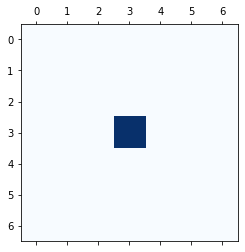

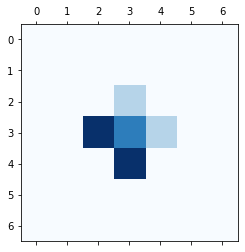

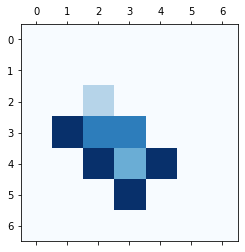

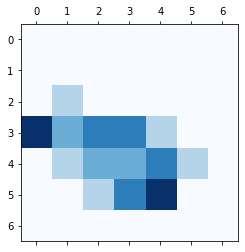

In [20]:
#example: run the following code

rules=[[[0.5,1],[0.5,4]],[[0.5,2],[0.5,3]],[[1,2]],[[1,3]],[[0.5,0]]]
#0= susceptible, 1=infected, 2= recovered, 3= dead, 4= disconnected
A=get_matrix(7)
Timeline=run_cellular_automaton(A,rules)
print("game result:")
if Timeline[1]==1:
    print("you won")
else:
    print("you lost")
timesteps(Timeline[0],Timeline[2])

>> In this coming section we discuss the experiments from the paper

In [21]:
# This is the experiment of section 3.3 where we keep the grid size set and we slowly increase the probability
# inputs: n_intervals = # of times you want to increase the probability, end and start points are always 1 and 0,
# so for example n_intervals = 20 => we increase the probability by 0.05 every time
# A = the grid
# rules = the transition rules as per run_cellular_automata()
# iterations = # times you run the game at each of the n_intervals, then you overage this win percentage and you append in a list
# output: a list of the average win percentages at each n_intervals





def experiment1(n_intervals, A,rules, iterations=20):
    win_percentage=[]
    for i in range(n_intervals):
        print("currently running", i) #code takes very long to run on some inputs, this is to indicate the step
        p=1/n_intervals*i
        rules[0][0][0]=p
        rules[0][1][0]=1-p
        rules[1][0][0]=p
        rules[1][1][0]=1-p
        win_round=[]
        for j in range(iterations):
            Timeline=run_cellular_automaton(A,rules)
            win_round.append(Timeline[1])
        win_percentage.append(np.mean(win_round))
    return win_percentage

currently running 0
currently running 1
currently running 2
currently running 3
currently running 4
currently running 5
currently running 6


<function matplotlib.pyplot.show(close=None, block=None)>

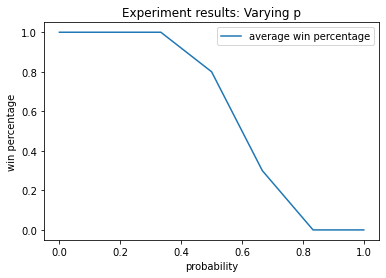

In [23]:
#example, run the following code:

rules=[[[0.5,1],[0.5,4]],[[0.5,2],[0.5,3]],[[1,2]],[[1,3]],[[0.5,0]]]
#0= susceptible, 1=infected, 2= recovered, 3= dead, 4= disconnected
A=get_matrix(15)
n_intervals=7
win_percentage=experiment1(n_intervals,A,rules, iterations=10)

x=np.linspace(0,1,n_intervals)
plt.plot(x,win_percentage, label="average win percentage")
plt.xlabel('probability')
plt.ylabel('win percentage')
plt.title('Experiment results: Varying p')
plt.legend()
plt.show

In [24]:
# This is the experiment of section 3.2 where we keep the rules set and we slowly increase the grid size
# inputs: n_intervals = # of grid size increases, each increase of size 2 (in side length),
# start = the grid size you want to start on
# rules = the transition rules as per run_cellular_automata()
# iterations = # times you run the game at each of the n_intervals, then you overage this win percentage and you append in a list
# output: a list of the average win percentages at each n_intervals





def experiment2(start,n_intervals,rules, iterations=10):
    win_percentage=[]
    for i in range(n_intervals):
        print("currently running", i) #code takes very long to run on some inputs, this is to indicate the step
        A=get_matrix(start+i*2)
        win_round=[]
        for j in range(iterations):
            Timeline=run_cellular_automaton(A,rules)
            win_round.append(Timeline[1])
        win_percentage.append(np.mean(win_round))
    return win_percentage
    

currently running 0
currently running 1
currently running 2
currently running 3
currently running 4
currently running 5
currently running 6
currently running 7
currently running 8
currently running 9


<function matplotlib.pyplot.show(close=None, block=None)>

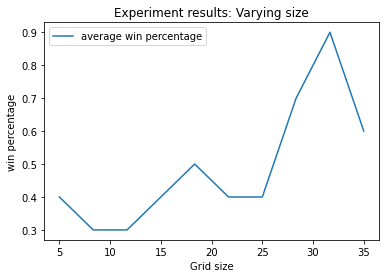

In [26]:
# example, run the following code:

rules=[[[0.5,1],[0.5,4]],[[0.5,2],[0.5,3]],[[1,2]],[[1,3]],[[0.5,0]]]
#0= susceptible, 1=infected, 2= recovered, 3= dead, 4= disconnected
start=5
n_intervals=10
win_percentage=experiment2(start,n_intervals,rules, iterations=10)
x=np.linspace(start,start+3*n_intervals,n_intervals)
plt.plot(x,win_percentage, label="average win percentage")
plt.xlabel('Grid size')
plt.ylabel('win percentage')
plt.title('Experiment results: Varying size')
plt.legend()
plt.show